<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/main/R%C3%A9gression_Lin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error : 0.0016319220350000994


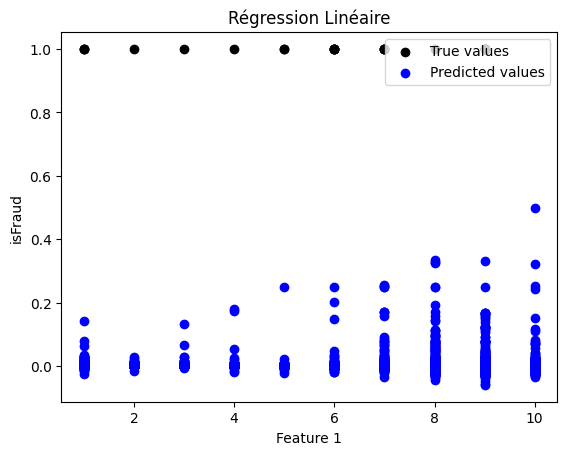

In [3]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Cette ligne est utilisée pour sélectionner uniquement les colonnes spécifiées
# dans la liste selected_columns à partir du DataFrame data.
# Cela permet de filtrer le DataFrame initial et de conserver uniquement les colonnes
# jugées pertinentes pour l'analyse ou la modélisation.
data = data[selected_columns]

# La ligne de code data.dropna(inplace=True) est utilisée pour supprimer les lignes contenant
# des valeurs manquantes (NaN) du DataFrame data. Cette opération est réalisée de manière inplace,
# ce qui signifie que le DataFrame original est modifié directement, plutôt que de créer une copie modifiée.
data.dropna(inplace=True)

# Encodage des variables catégorielles avec OneHotEncoder
# Vous pouvez également utiliser get_dummies de pandas

categorical_columns = ['type', 'nameOrig', 'nameDest']
numeric_columns = list(set(selected_columns) - set(categorical_columns) - {'isFraud'})

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Séparation des caractéristiques (X) et de la variable cible (y)
# Prépare mes données pour l'entraînement d'un modèle
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un modèle de régression linéaire
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle (pour une tâche de régression)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :", mse)

# Affichage de la courbe de régression
plt.scatter(X_test['step'], y_test, color='black', label='True values')
plt.scatter(X_test['step'], y_pred, color='blue', label='Predicted values')
plt.xlabel('Feature 1')
plt.ylabel('isFraud')
plt.title('Régression Linéaire')
plt.legend(loc='upper right')  # Modifié ici
plt.show()
